# Exploratory Analysis - Terrorism

--------------------------------------------------------------------------------------

Author: Zeel Tanna

Data Set: https://www.kaggle.com/datasets/itssuru/global-terrorism

------------------------------------------------------------------------------------

                                    **IMPORT LIBRARIES NEEDED FOR ANALYSIS**

In [93]:
import numpy as np #provides a high-performance multidimensional array object
import pandas as pd #allows us to perform analysis of big data
import matplotlib as mpl #data visualization library
import matplotlib.pyplot as plt #used for data visualization and plotting on graphs
import seaborn as sns #library for making statistical graphics
%matplotlib inline

                                     **IMPORTING AND OBSERVE THE DATA**

In [94]:
data=pd.read_csv(r"C:\Users\zeelt\Desktop\GRIP SPARKS PROJECTS\Global Terrorism - START data\globalterrorismdb_0718dist.csv", encoding="latin1", low_memory=False)
df=pd.DataFrame(data)
print("Data is successfully imported")
df.head()

Data is successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [96]:
df.shape

(181691, 135)

In [97]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [98]:
for i in df.columns:
    print(i,end=",")

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

                                            **CLEANING THE DATA SET**

In [99]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   location         55495 non-null   object 
 10  summary          115562 non-null  object 
 11  attacktype1_txt  181691 non-null  object 
 12  targtype1_txt    181691 non-null  object 
 13  gname            181691 non-null  object 
 14  motive           50561 non-null   object 
 15  weaptype1_txt    181691 non-null  object 
 16  nkill            171378 non-null  floa

In [101]:
df.shape

(181691, 19)

In [102]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
region_txt              0
provstate             421
city                  434
latitude             4556
longitude            4557
location           126196
summary             66129
attacktype1_txt         0
targtype1_txt           0
gname                   0
motive             131130
weaptype1_txt           0
nkill               10313
nwound              16311
addnotes           153402
dtype: int64

In [103]:
df["nkill"]=df["nkill"].fillna(0)
df["nwound"]=df["nwound"].fillna(0)
df["Casualty"]=df["nkill"]+df["nwound"]

In [104]:
df.describe()

,iyear,imonth,iday,latitude,longitude,nkill,nwound,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


**OBSERVATIONS TO BE MADE**

    1. The data consists of terrorist activities ranging from the year: 1970 to 2017
    2. Maximum number of people killed in an event were: 1570
    3. Maximum number of people wounded in an event were: 8191
    4. Maximum number of total casualties in an event were: 9574

                                                  **VISUALIZING THE DATA**

### ***YEAR WISE ATTACKS***

    1. Number of Attacks Each Year

In [105]:
attacks=df["iyear"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,iyear
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


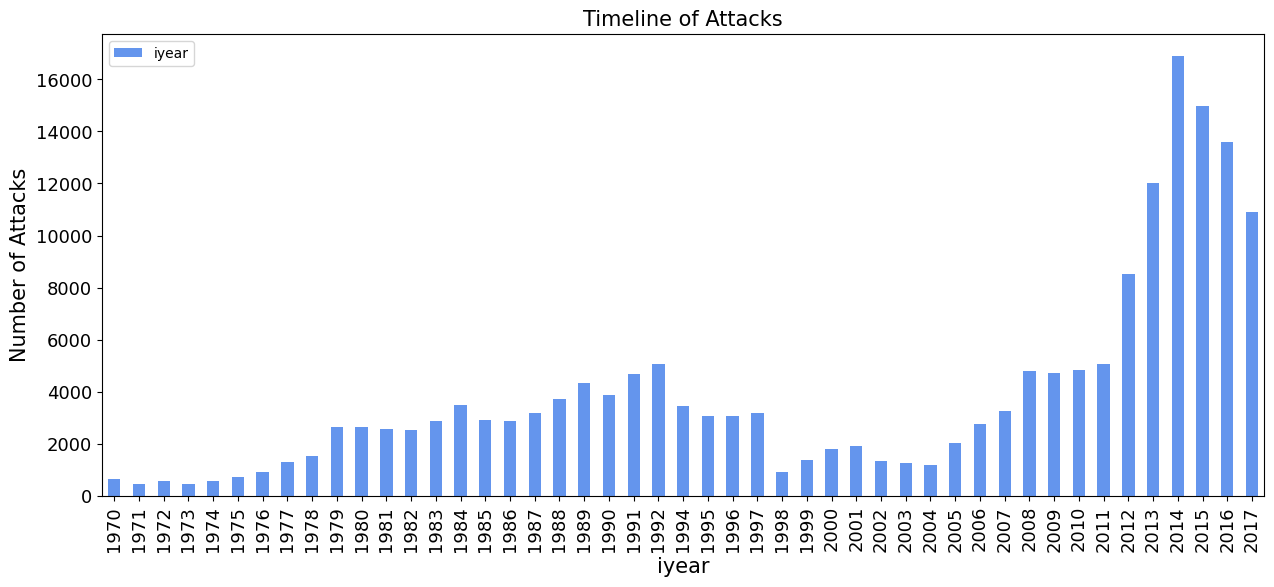

In [106]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("iyear",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

**NOTE**: (i) Most number of attacks are in the year **2014** : 16903
         (ii) Least number of attacks in in the year **1971** : 471

    2. Total Casualties each Year: (Killed + Wounded)

In [107]:
yc=df[["iyear","Casualty"]].groupby("iyear").sum()
yc.head()

,Casualty
iyear,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


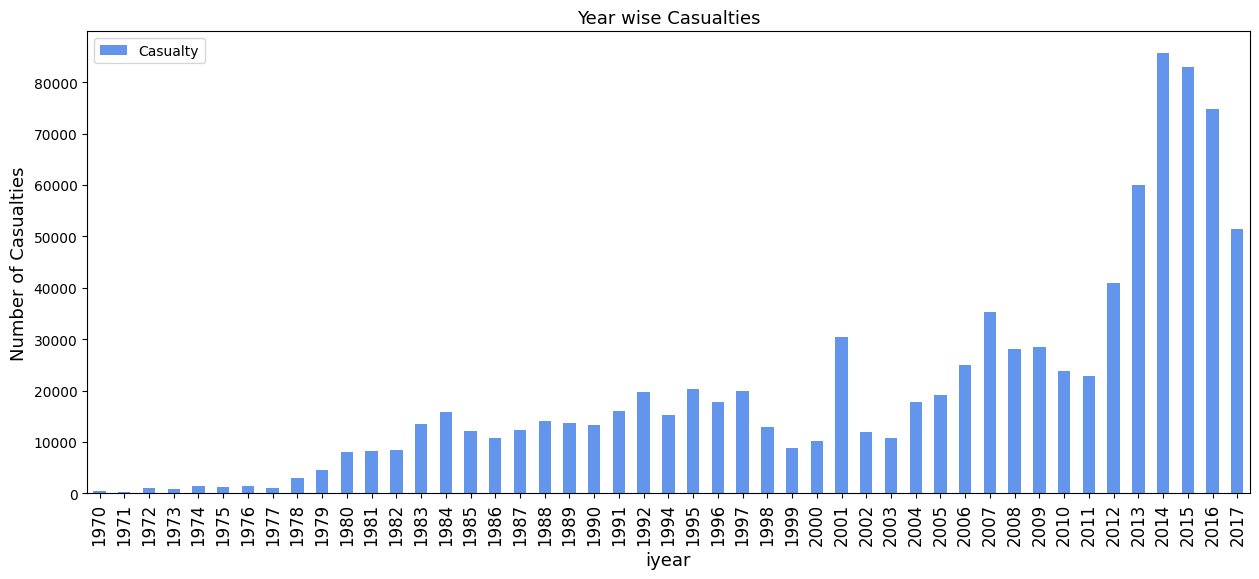

In [108]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("iyear",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    3. Killed in Each Year

In [109]:
yk=df[["iyear","nkill"]].groupby("iyear").sum() #nkill is number of people killed
yk.head()

,nkill
iyear,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


    4. Wounded in Each Region

In [110]:
yw=df[["iyear","nwound"]].groupby("iyear").sum() #nwound is number of people wounded
yw.head()

,nwound
iyear,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


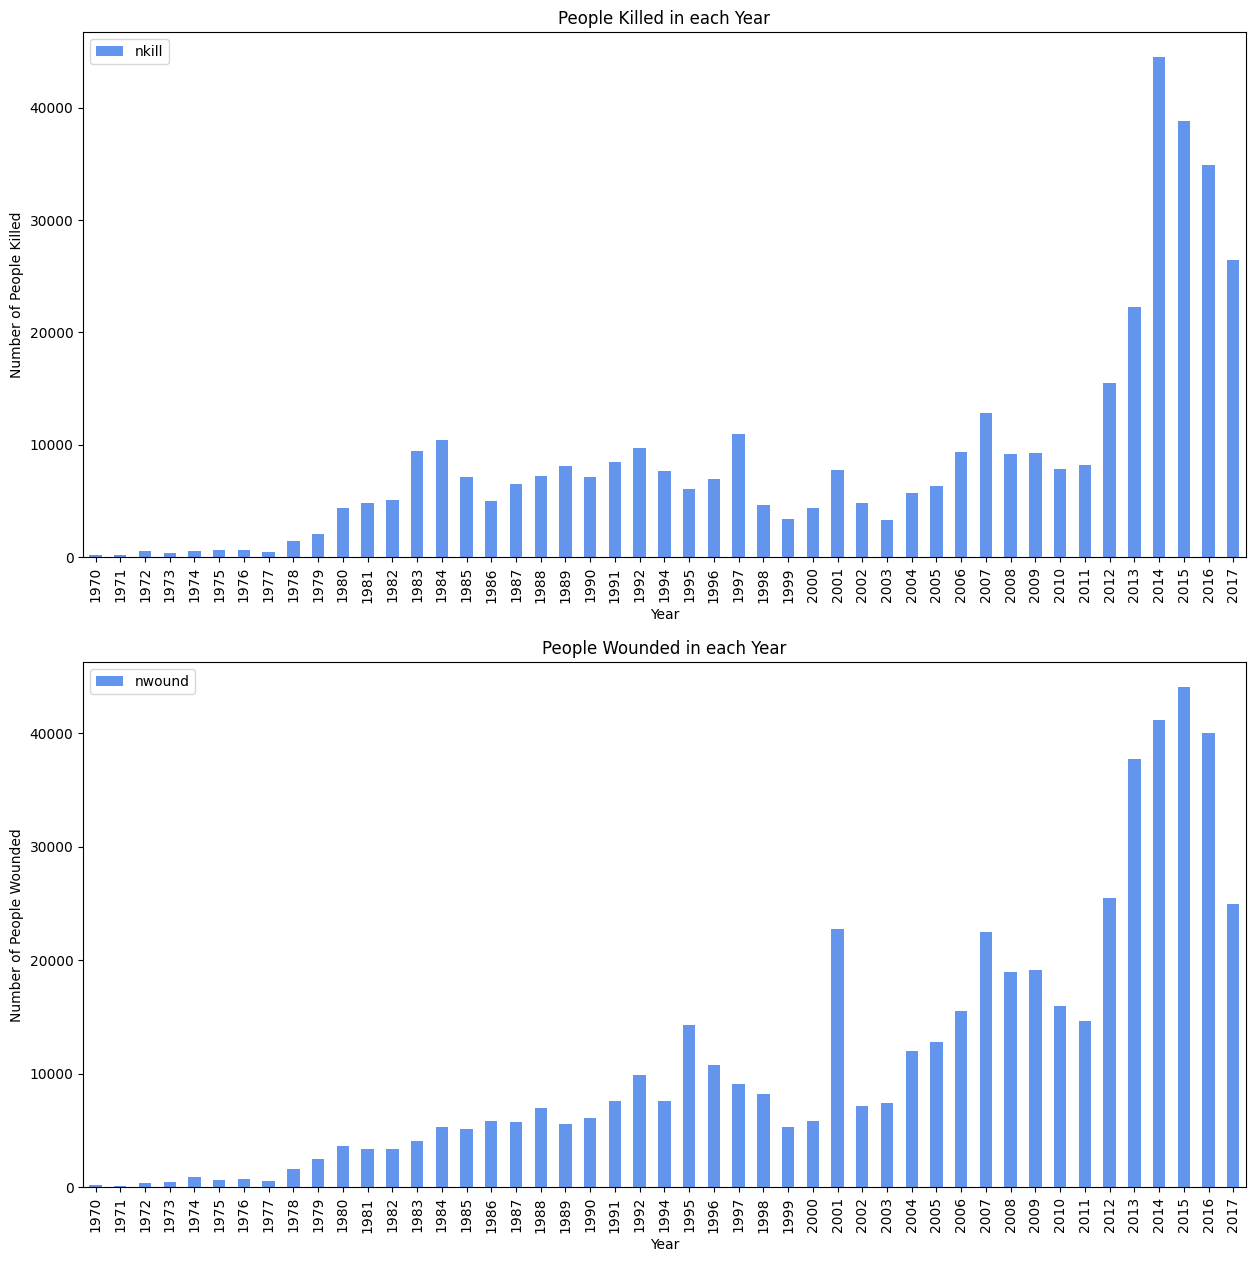

In [111]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Year")
ax0.set_ylabel("Number of People Killed") 

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### ***REGION WISE ATTACKS***

    1. Distribution of Attacks over Regions from 1970-2017

In [112]:
reg=pd.crosstab(df.iyear,df.region_txt)
reg.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
iyear,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


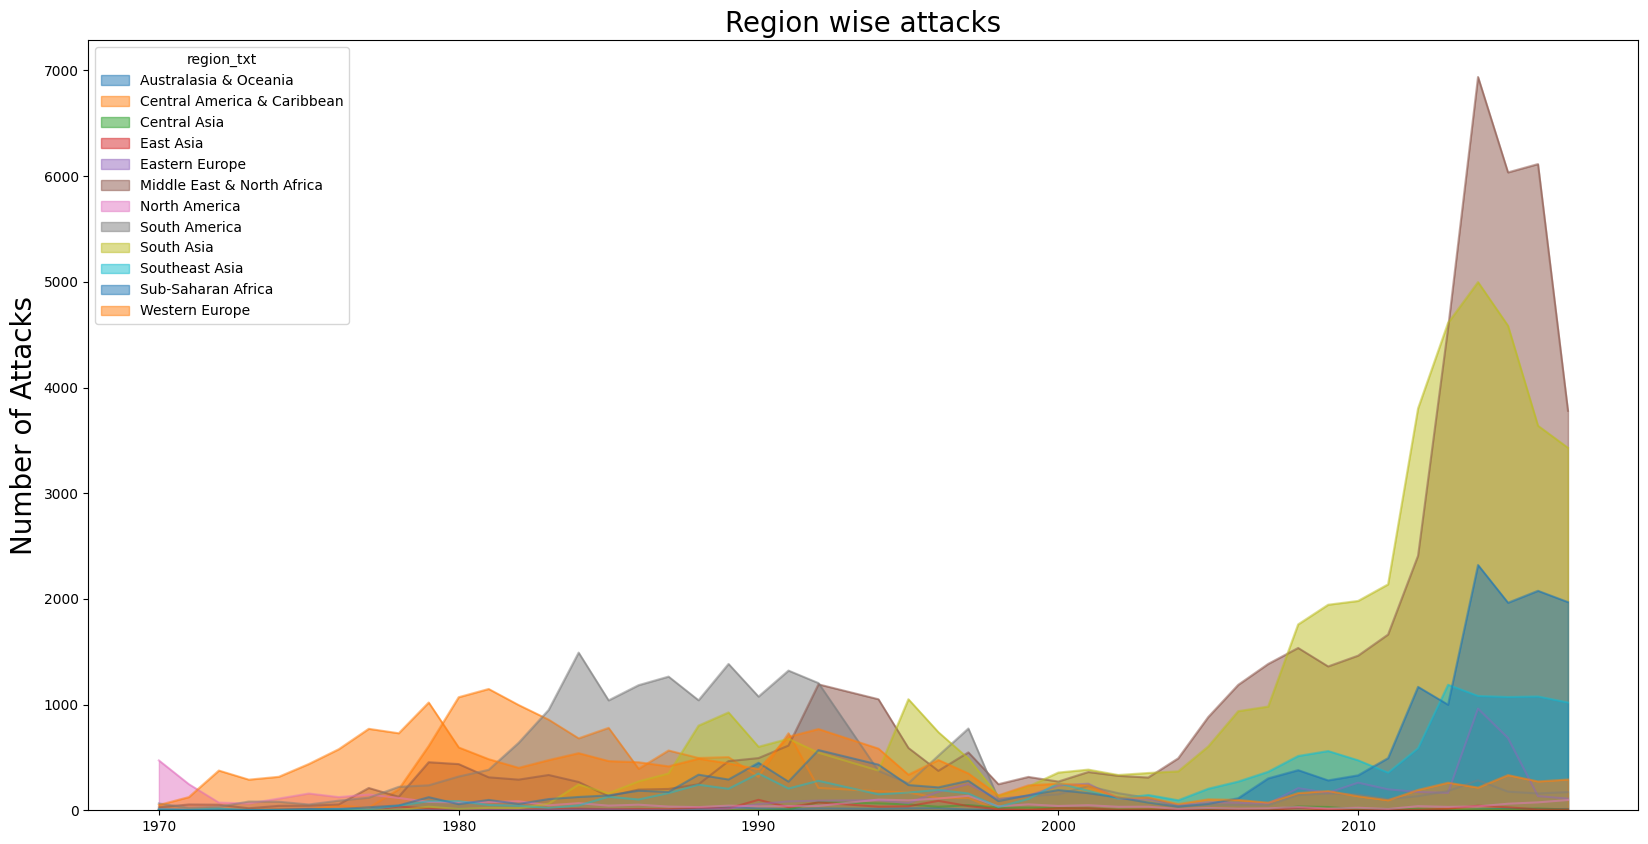

In [113]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

     2. Total Attacks in each Region from year 1970 - 2017

In [114]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

region_txt
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

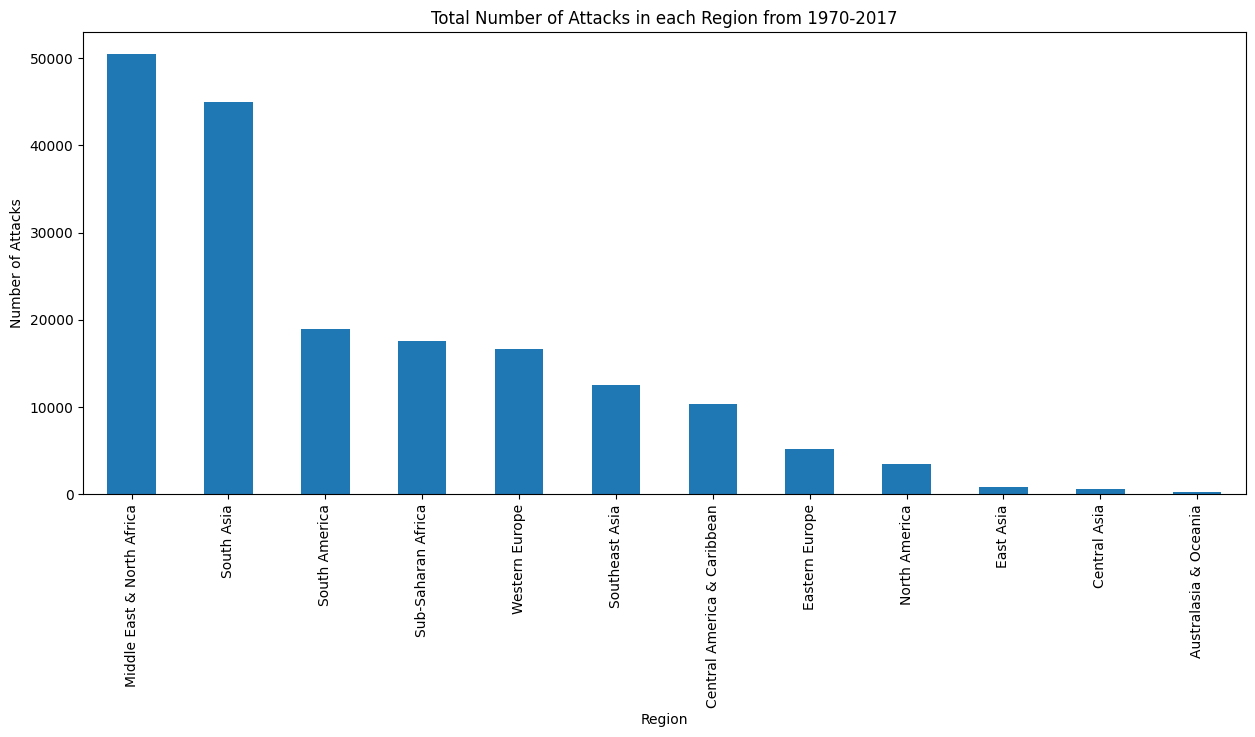

In [115]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

    3. Total Casualties in each Region: Killed + Wounded

In [116]:
rc=df[["region_txt","Casualty"]].groupby("region_txt").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
region_txt,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


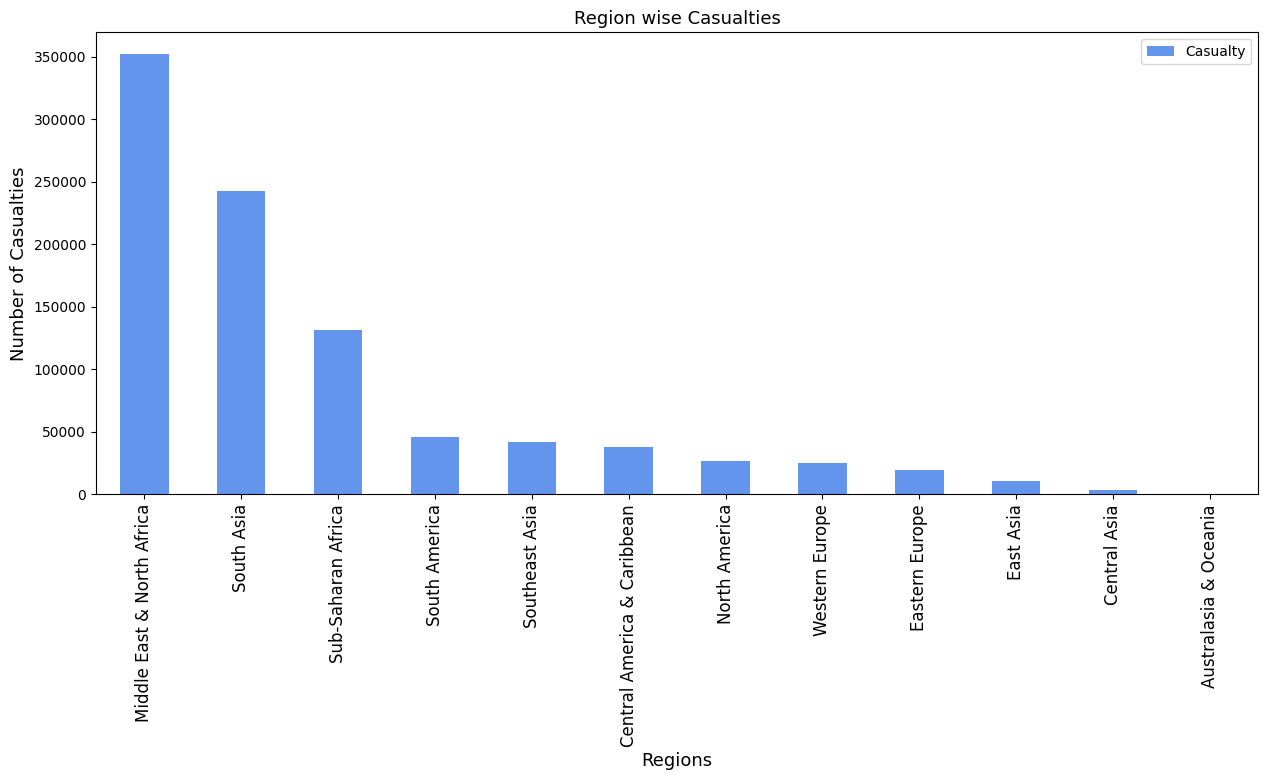

In [117]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    4. Killed in each Region

In [118]:
rk=df[["region_txt","nkill"]].groupby("region_txt").sum().sort_values(by="nkill",ascending=False)
rk

,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


    5. Wounded in each Region

In [119]:
rw=df[["region_txt","nwound"]].groupby("region_txt").sum().sort_values(by="nwound",ascending=False)
rw

,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


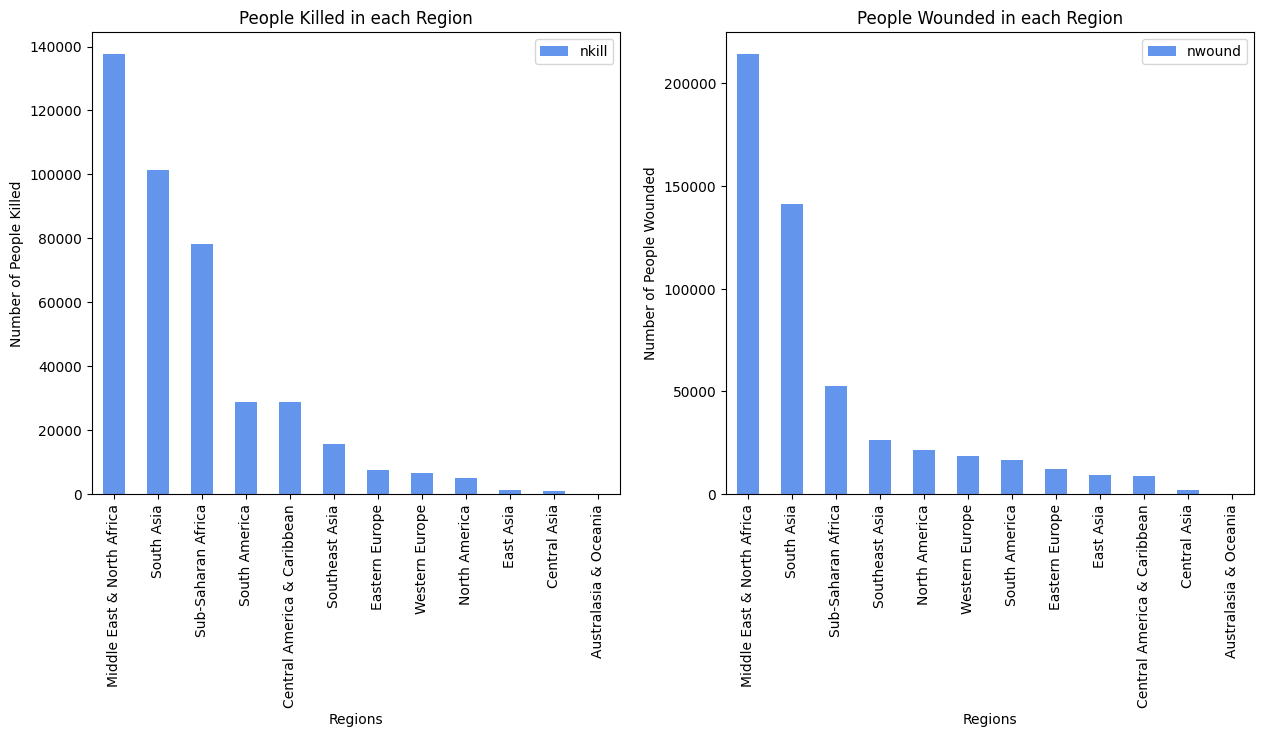

In [120]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### ***TOP 10 COUNTRY WISE ATTACKS***

    1. Number of Attacks in each country

In [121]:
ct=df["country_txt"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

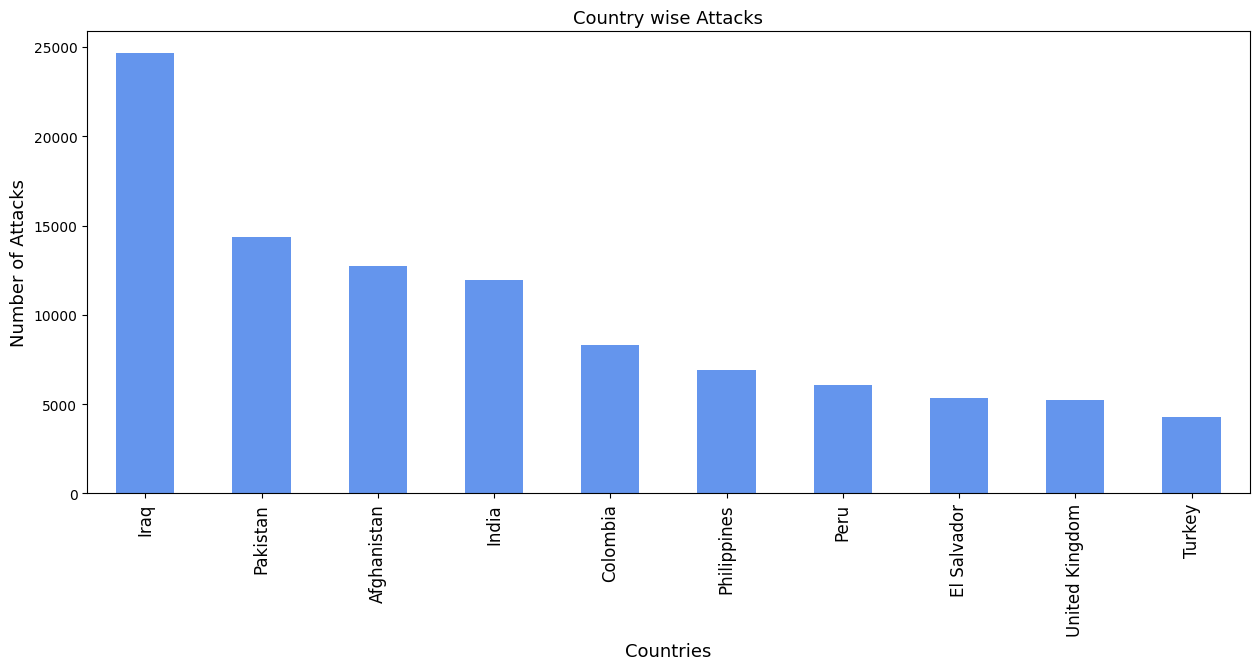

In [122]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

    2. Total Casualties in each Country: Killed + Wounded

In [123]:
cnc=df[["country_txt","Casualty"]].groupby("country_txt").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
country_txt,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


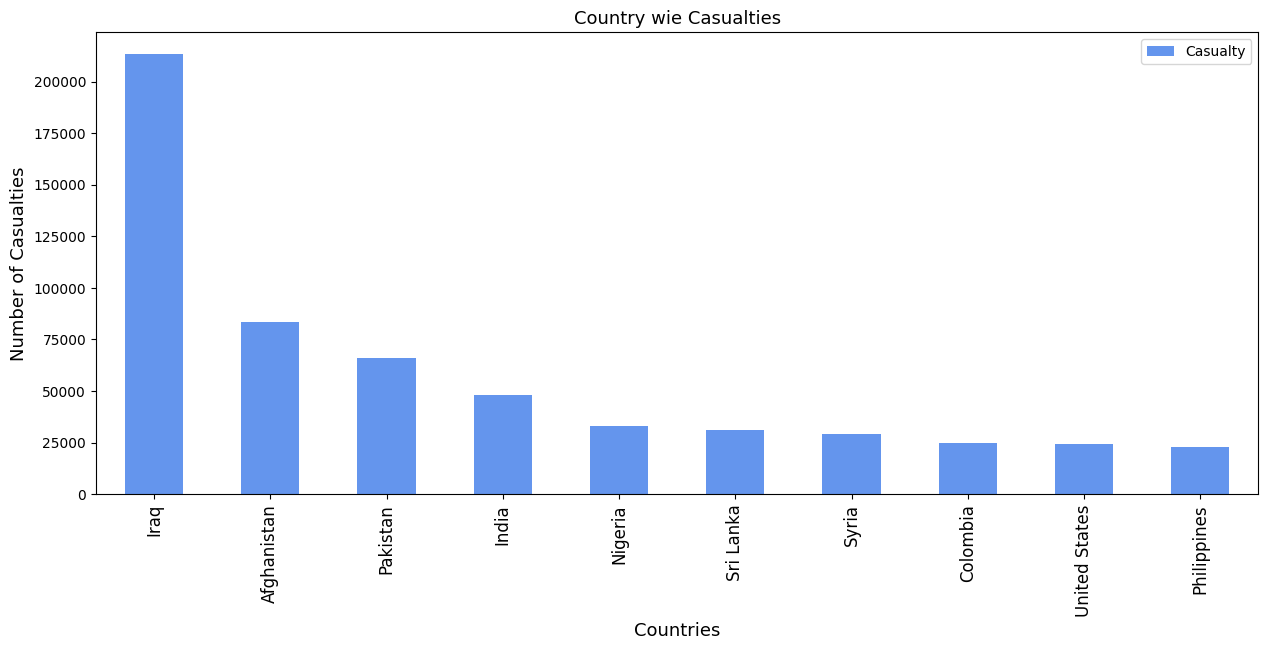

In [124]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    3. Killed in each Country

In [125]:
cnk=df[["country_txt","nkill"]].groupby("country_txt").sum().sort_values(by="nkill",ascending=False)
cnk.head(10)

,nkill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


    4. Wounded in each Country

In [126]:
cnw=df[["country_txt","nwound"]].groupby("country_txt").sum().sort_values(by="nwound",ascending=False)
cnw.head(10)

,nwound
country_txt,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


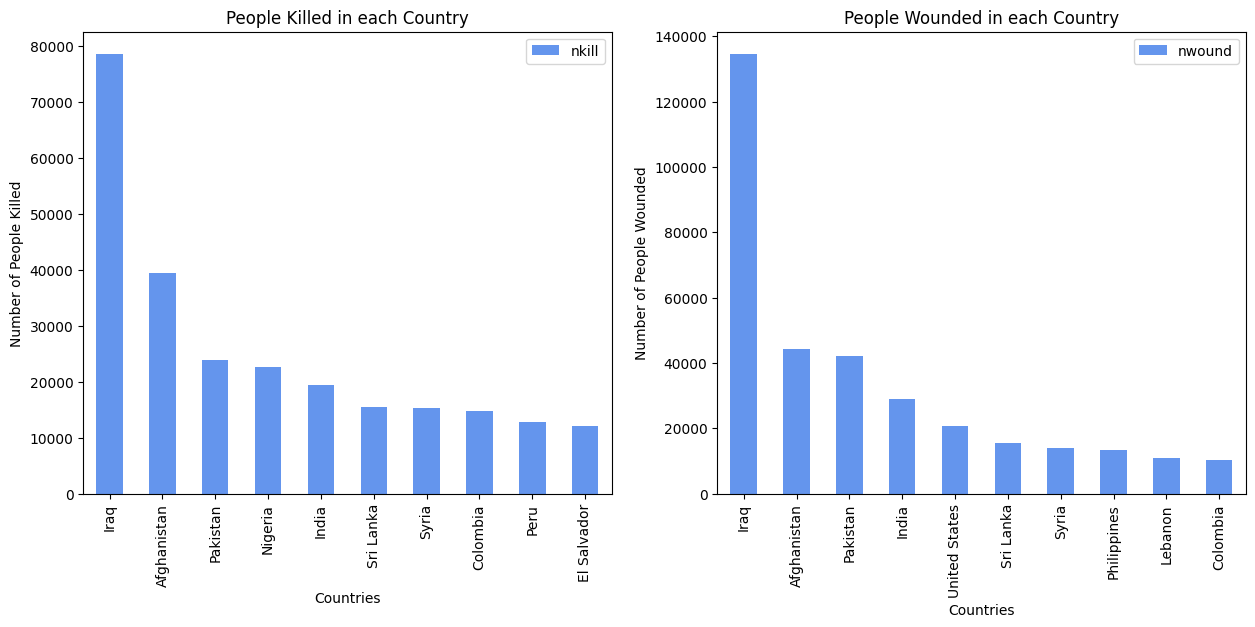

In [127]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### ***CITY WISE TOP 10 ATTACKS***

    1. Number of attacks in each City

In [128]:
city=df["city"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

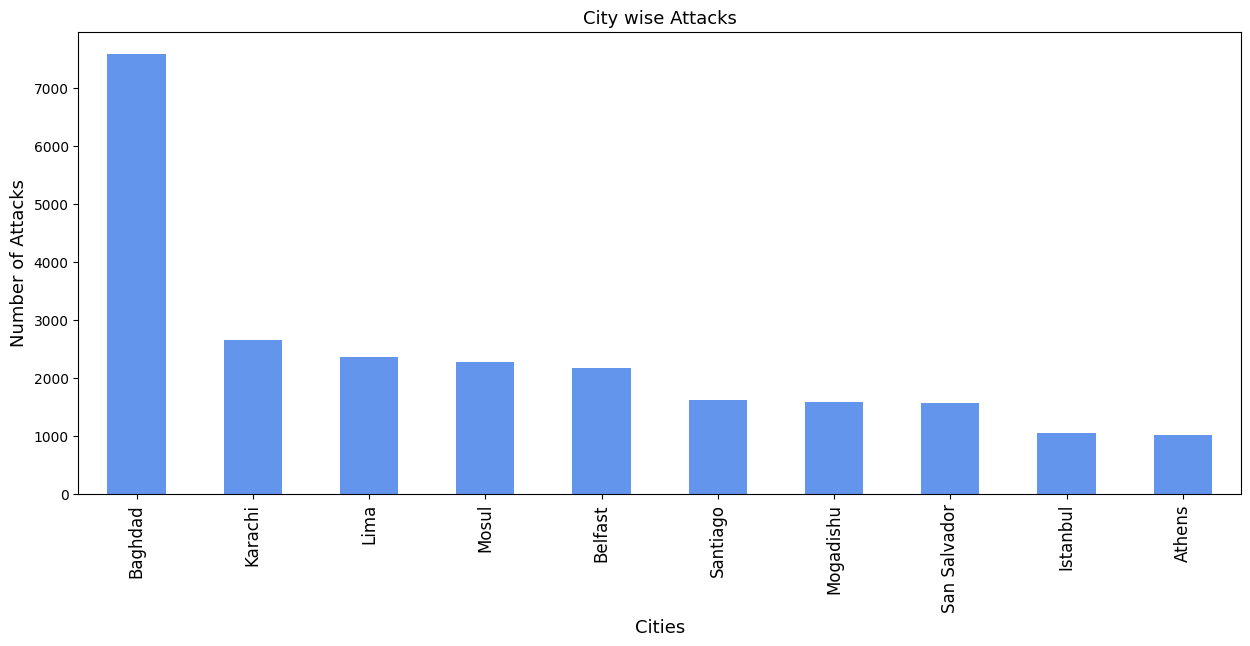

In [129]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

    2. Total Casualties in each City: Killed + Wounded

In [130]:
cc=df[["city","Casualty"]].groupby("city").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
city,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


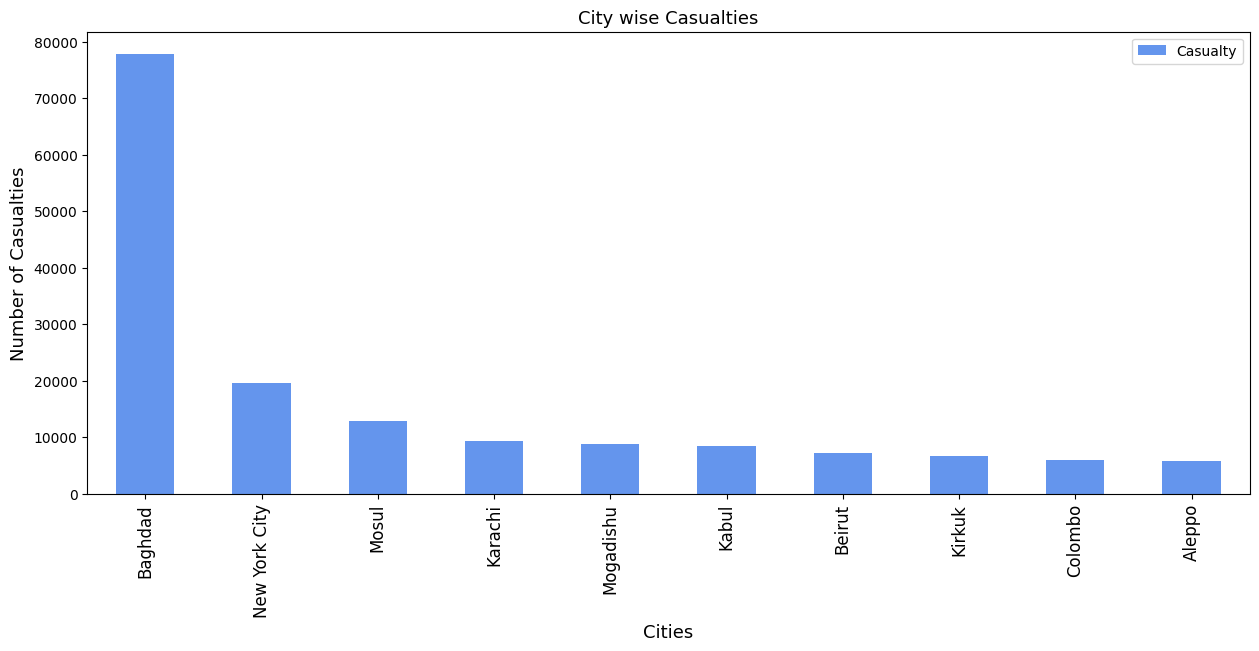

In [131]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    3. Killed in each City

In [132]:
ck=df[["city","nkill"]].groupby("city").sum().sort_values(by="nkill",ascending=False).drop("Unknown")
ck.head(10)

,nkill
city,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


 4. Wounded in each City

In [133]:
cw=df[["city","nwound"]].groupby("city").sum().sort_values(by="nwound",ascending=False).drop("Unknown")
cw.head(10)

,nwound
city,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


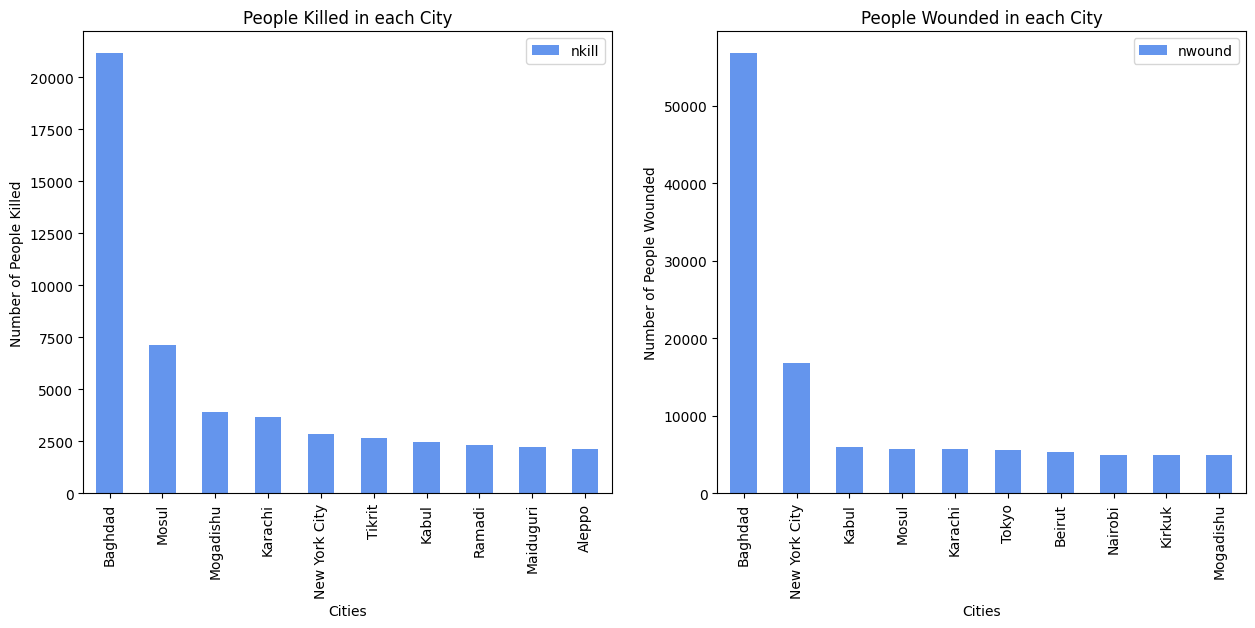

In [134]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### ***TOP 10 TERRORIST GROUPS WISE ATTACKS***

    1. Number of Attacks by each Group

In [135]:
grp=df["gname"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: gname, dtype: int64

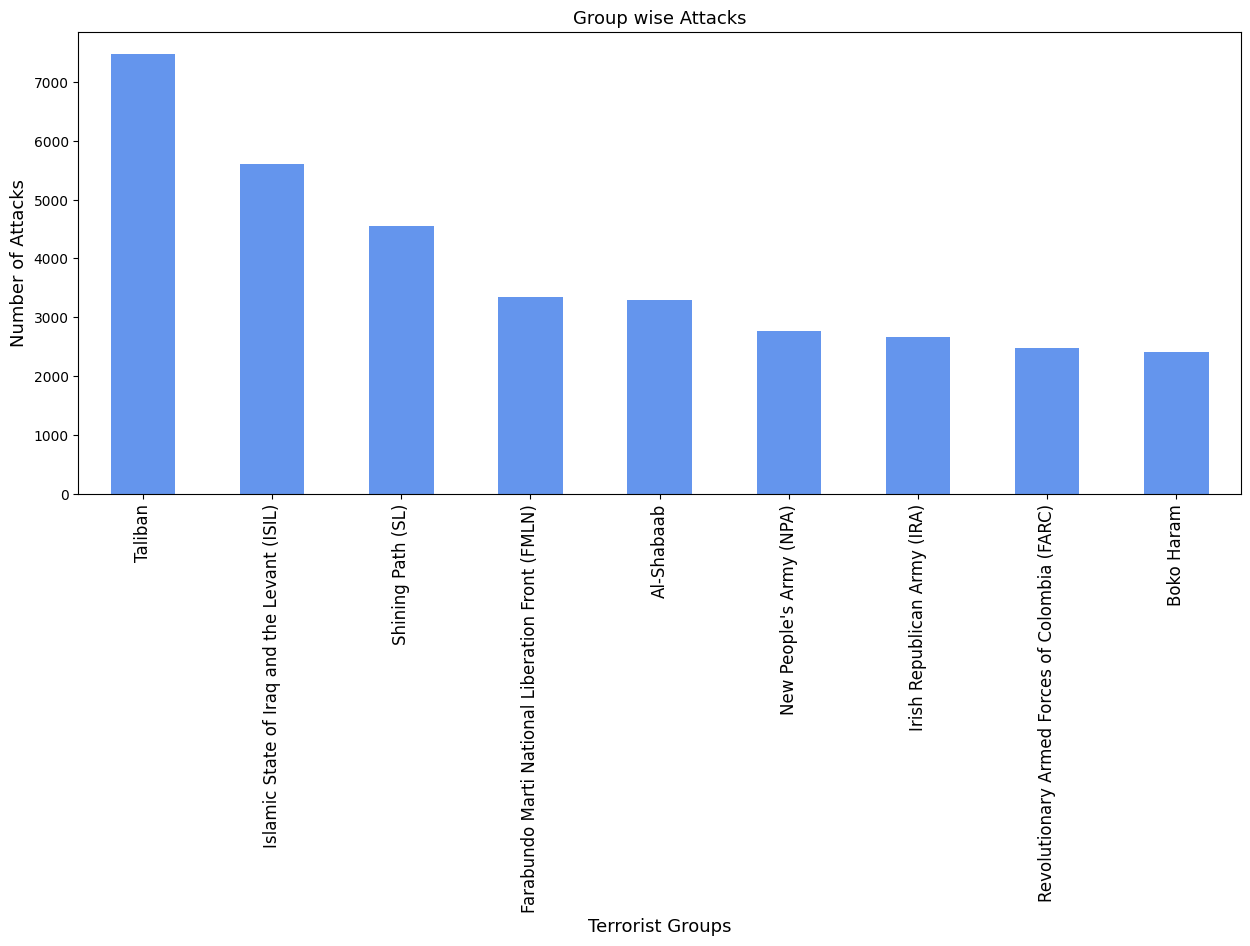

In [136]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

    2. Total Casualties by each Group: Killed + Wounded

In [137]:
gc=df[["gname","Casualty"]].groupby("gname").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
gname,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


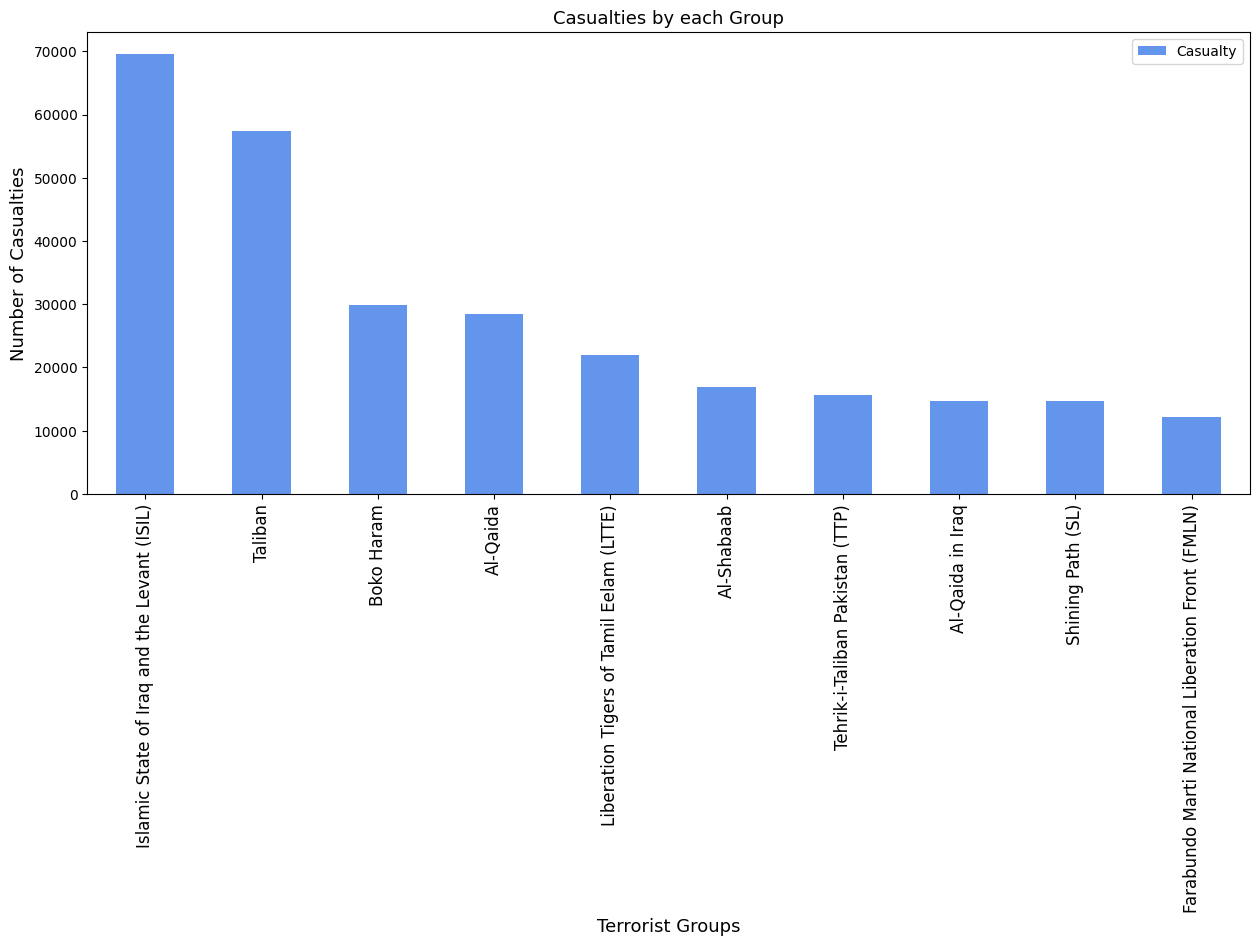

In [138]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    3. Killed by each Group

In [139]:
gk=df[["gname","nkill"]].groupby("gname").sum().sort_values(by="nkill",ascending=False).drop("Unknown")
gk.head(10)

,nkill
gname,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


    4. Number of Wounded by each Group

In [140]:
gw=df[["gname","nwound"]].groupby("gname").sum().sort_values(by="nwound",ascending=False).drop("Unknown")
gw.head(10)

,nwound
gname,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


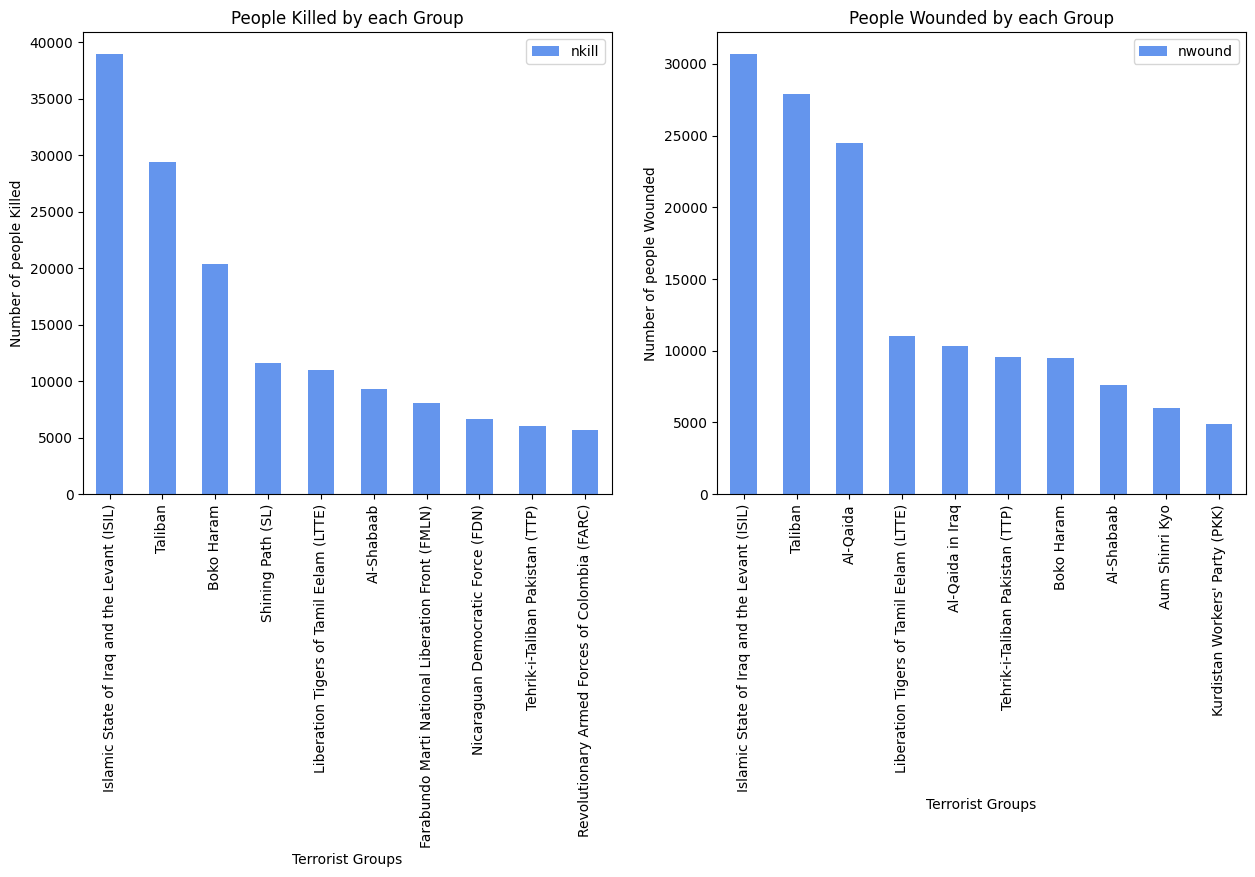

In [141]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### ***TYPE OF ATTACKS***

    1. Number of Attacks by each attack type

In [142]:
at=df["attacktype1_txt"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

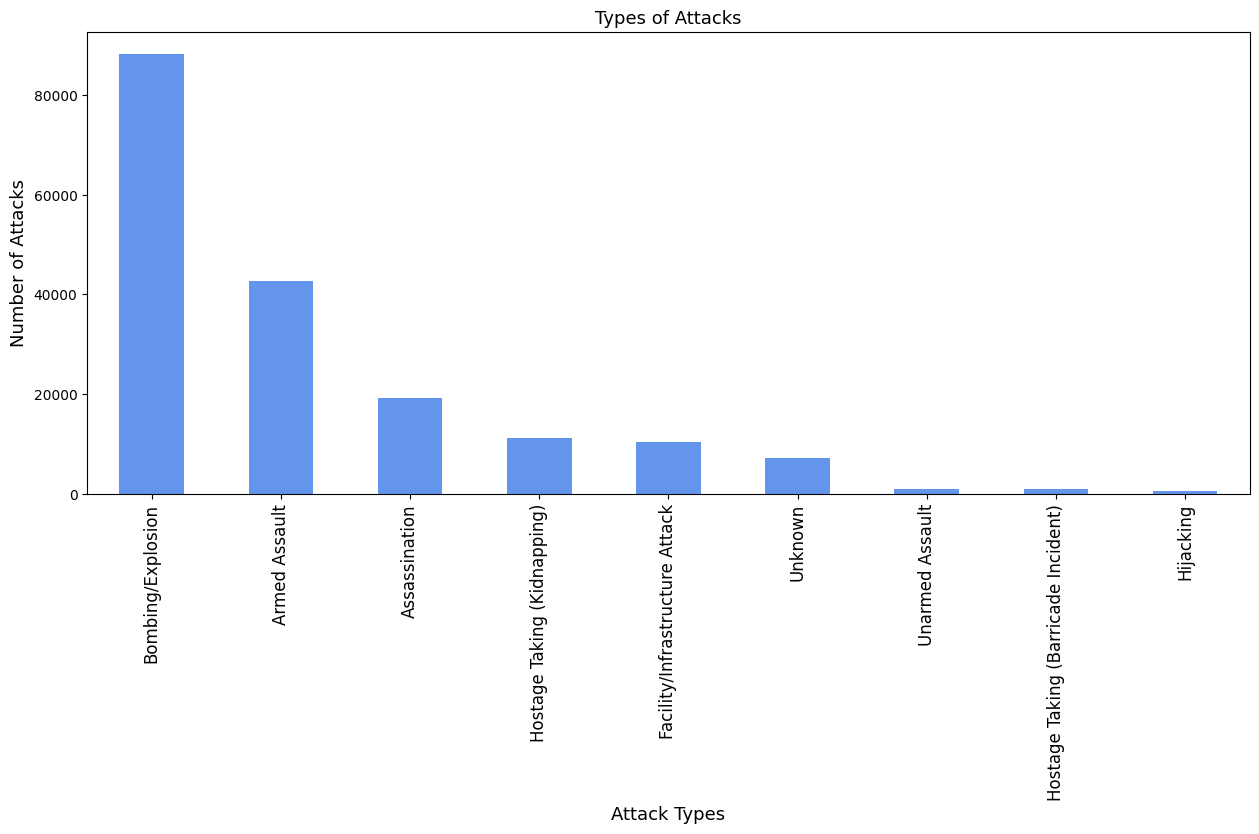

In [143]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

    2. Total Casualties by each Attack Type: Killed and Wounded

In [144]:
ac=df[["attacktype1_txt","Casualty"]].groupby("attacktype1_txt").sum().sort_values(by="Casualty",ascending=False)
ac

,Casualty
attacktype1_txt,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


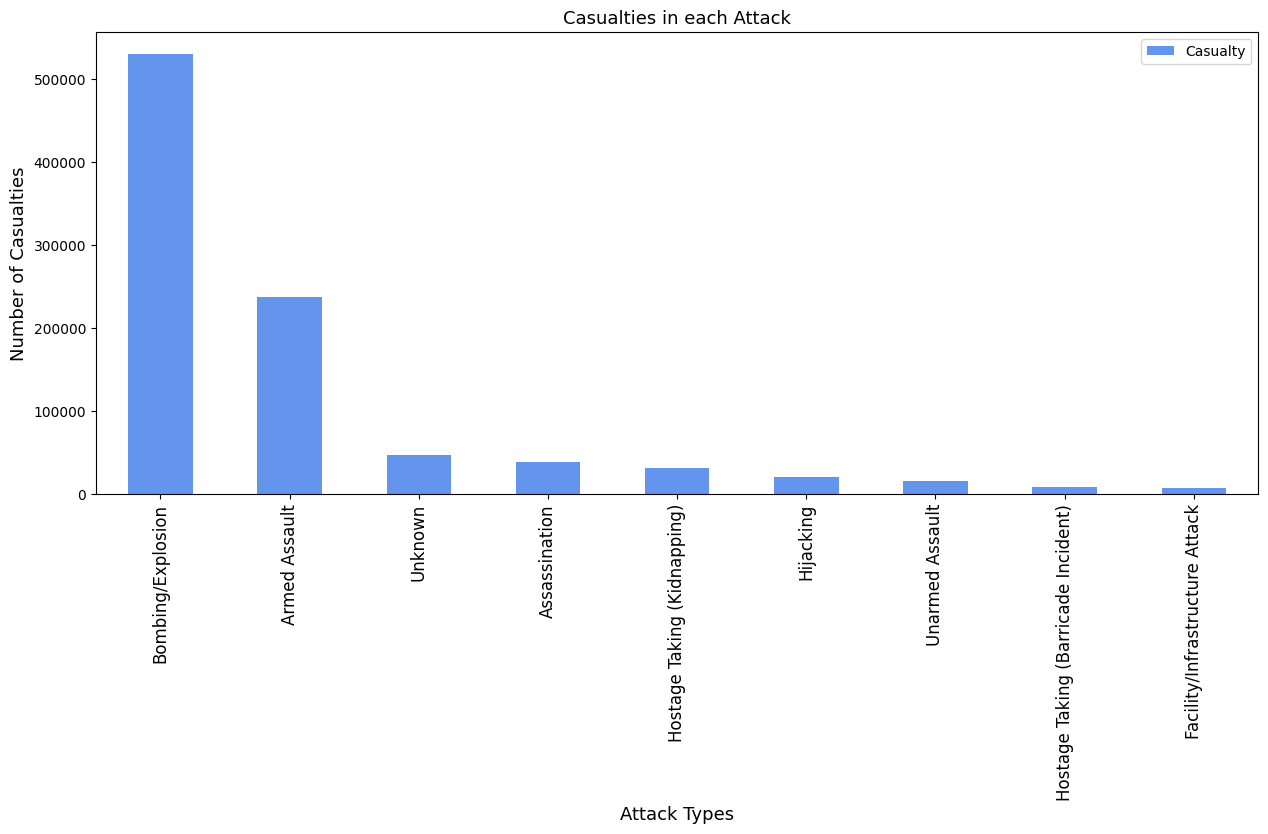

In [145]:
ac.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Attack",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

        2. Killed by each Attack Type:

In [146]:
ak=df[["attacktype1_txt","nkill"]].groupby("attacktype1_txt").sum().sort_values(by="nkill",ascending=False)
ak

,nkill
attacktype1_txt,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


    4. Wounded by each Attack Type

In [147]:
aw=df[["attacktype1_txt","nwound"]].groupby("attacktype1_txt").sum().sort_values(by="nwound",ascending=False)
aw

,nwound
attacktype1_txt,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


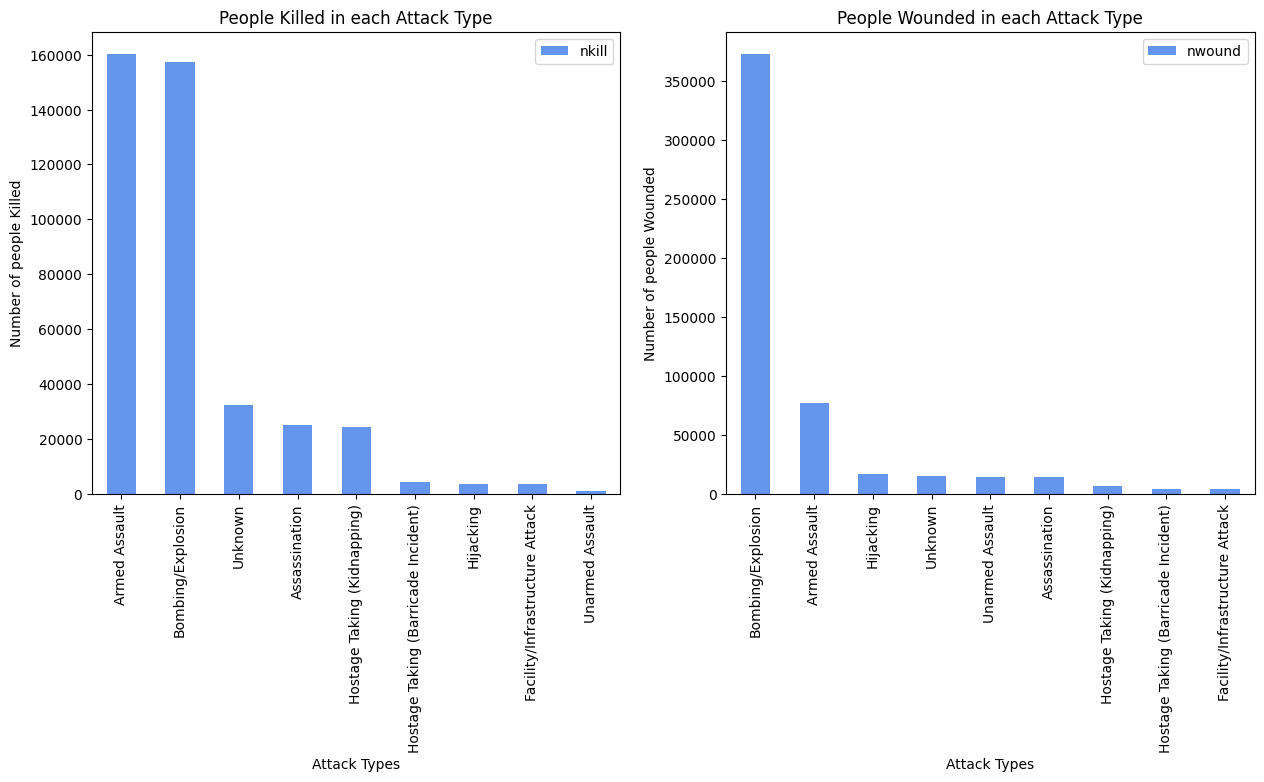

In [148]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### ***Target Type wise Attacks***

    1. Number of Attacks over each Target Type

In [149]:
ta=df["targtype1_txt"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

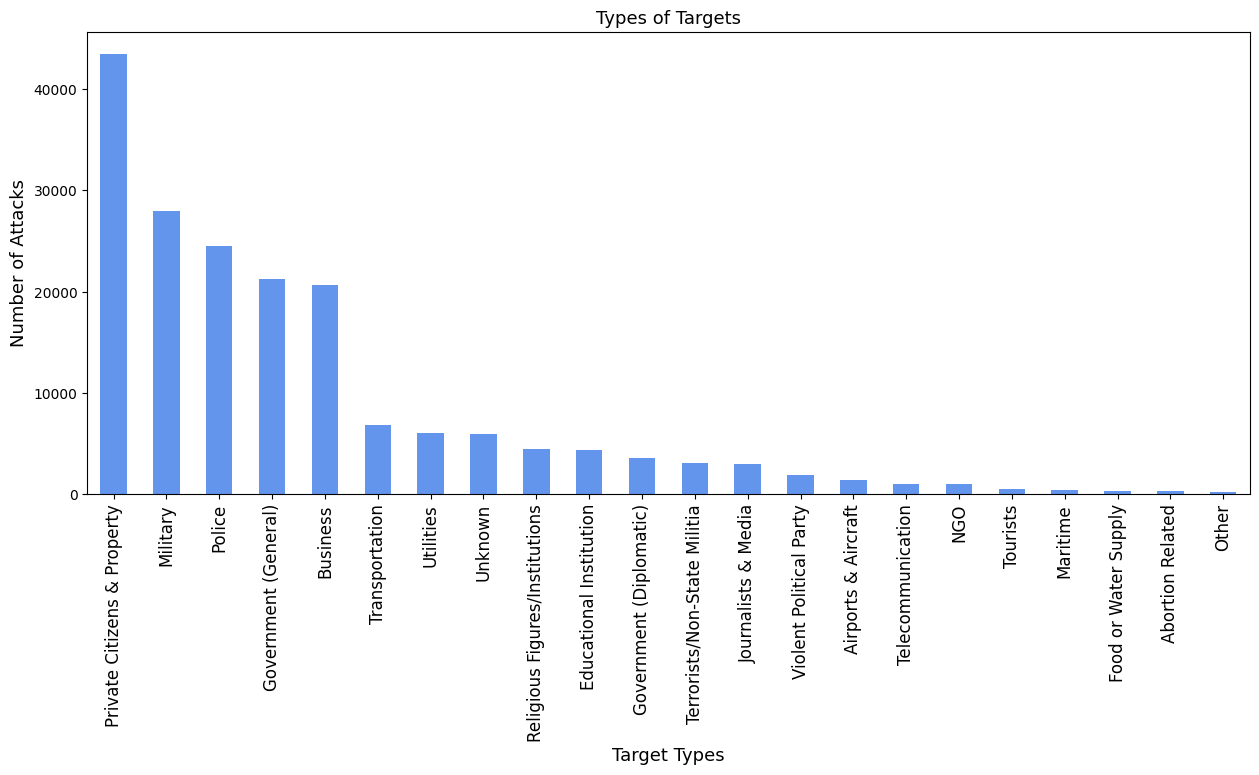

In [150]:
ta.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [151]:
tc=df[["targtype1_txt","Casualty"]].groupby("targtype1_txt").sum().sort_values(by="Casualty",ascending=False)
tc

,Casualty
targtype1_txt,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


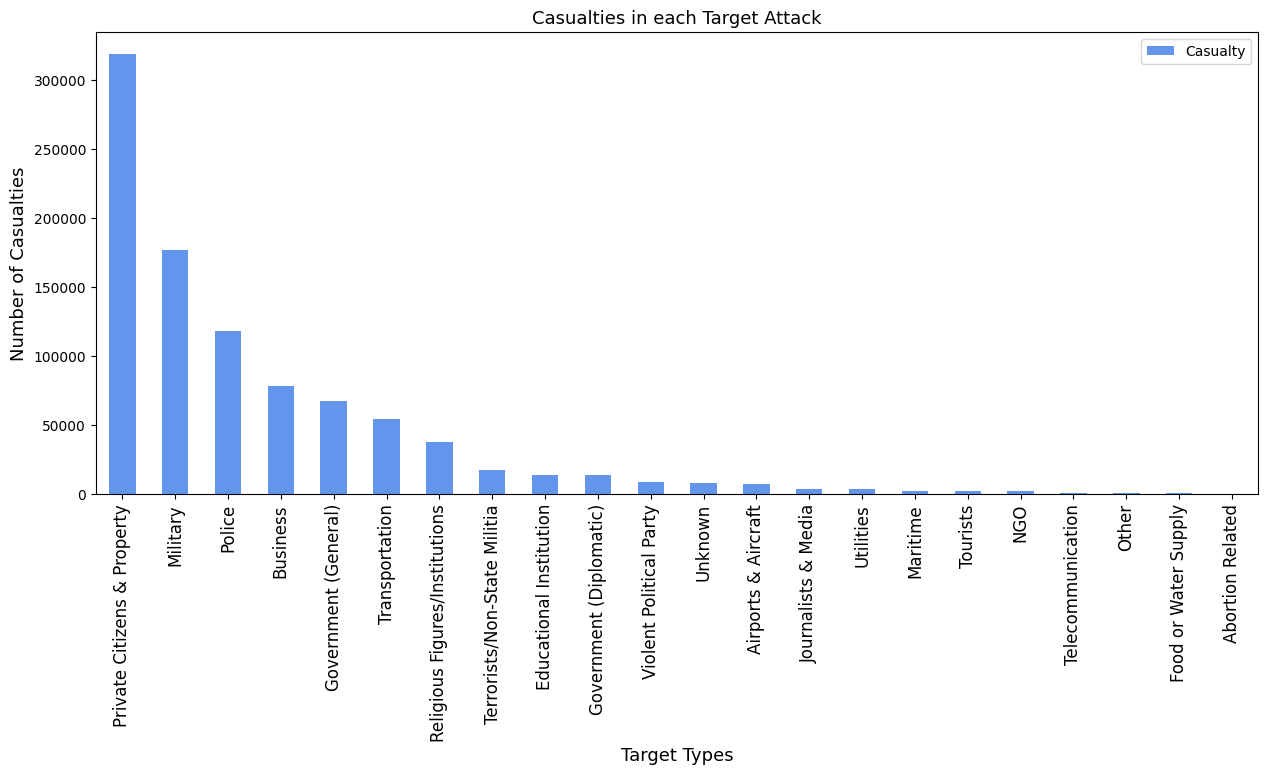

In [152]:
tc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [153]:
tk=df[["targtype1_txt","nkill"]].groupby("targtype1_txt").sum().sort_values(by="nkill",ascending=False)
tk

,nkill
targtype1_txt,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


In [154]:
tw=df[["targtype1_txt","nwound"]].groupby("targtype1_txt").sum().sort_values(by="nwound",ascending=False)
tw

,nwound
targtype1_txt,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


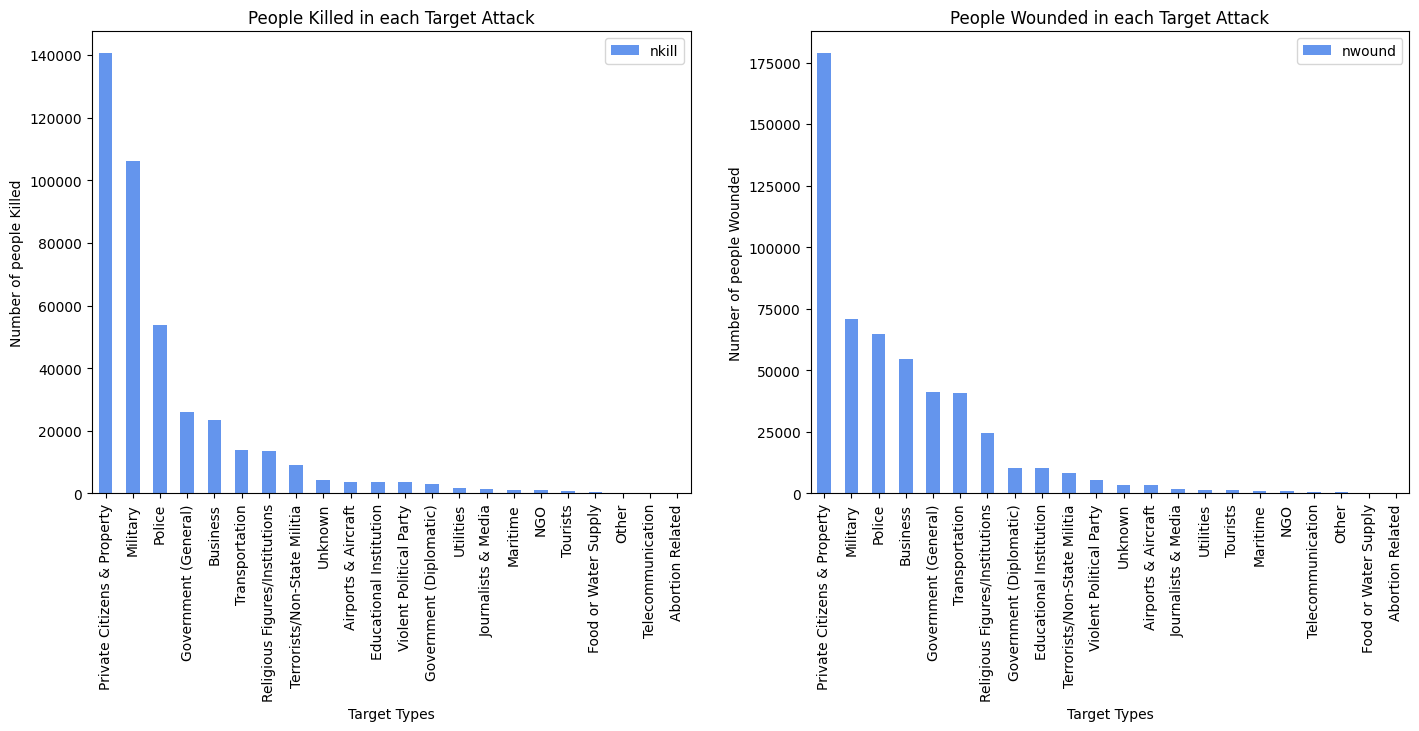

In [155]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="cornflowerblue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

### ***Group + Country wise - Top10***

    1.Sorting by number of Attacks

In [156]:
gca=df[["gname","country_txt"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\zeelt\AppData\Local\Temp\ipykernel_4504\3028430943.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["gname","country_txt"]].value_counts().drop("Unknown")


gname                                             country_txt   
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

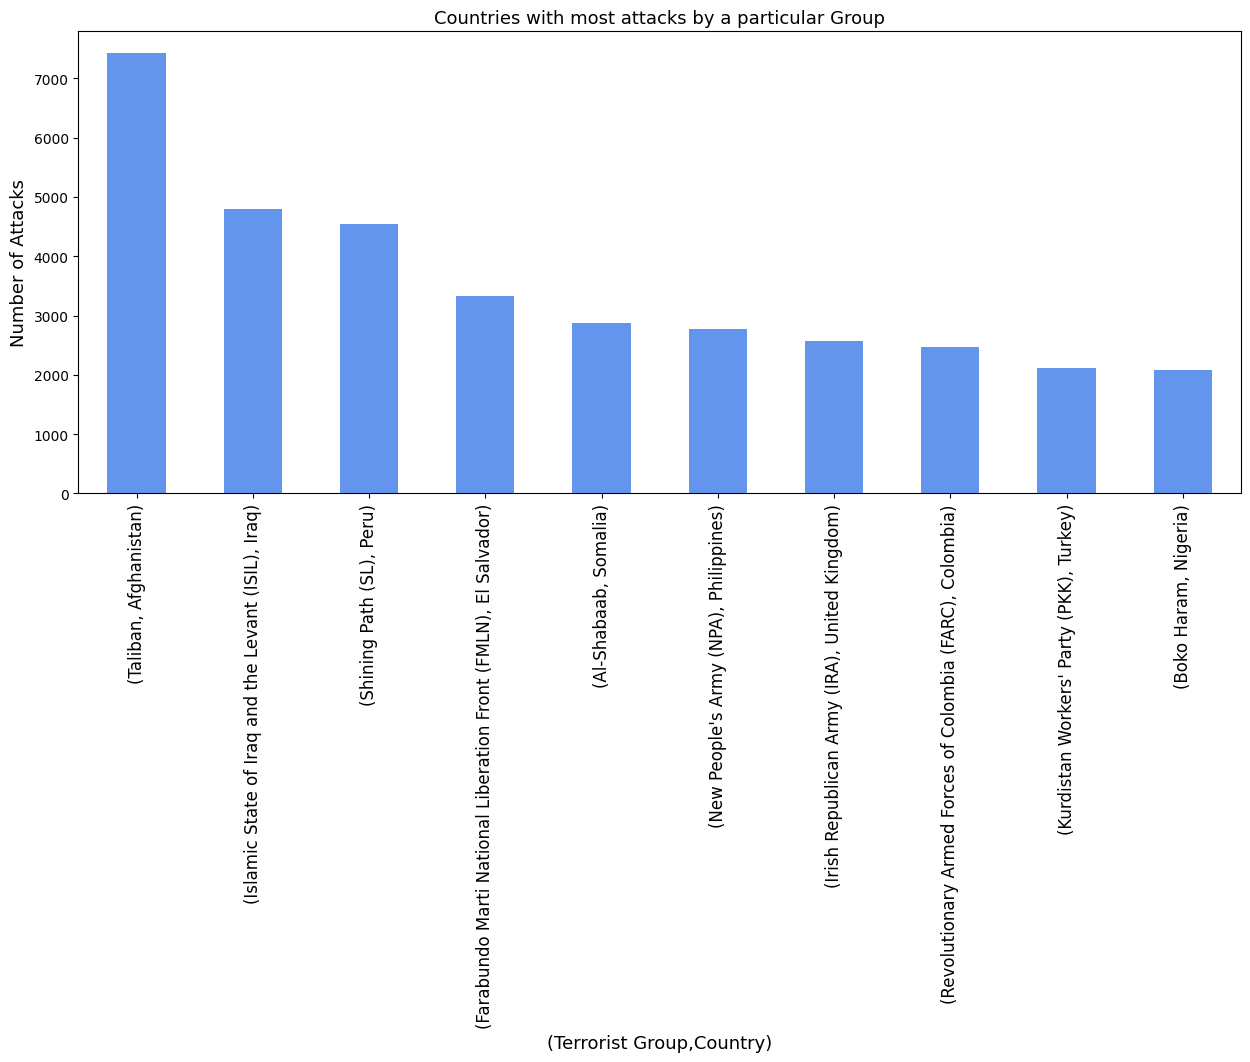

In [157]:
gca.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

    2.Sorting by Number of Casualties

In [158]:
gcc=df[["gname","country_txt","Casualty"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)
gcc

C:\Users\zeelt\AppData\Local\Temp\ipykernel_4504\780861939.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc=df[["gname","country_txt","Casualty"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="Casualty",ascending=False).drop("Unknown").head(10)


,,Casualty
gname,country_txt,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


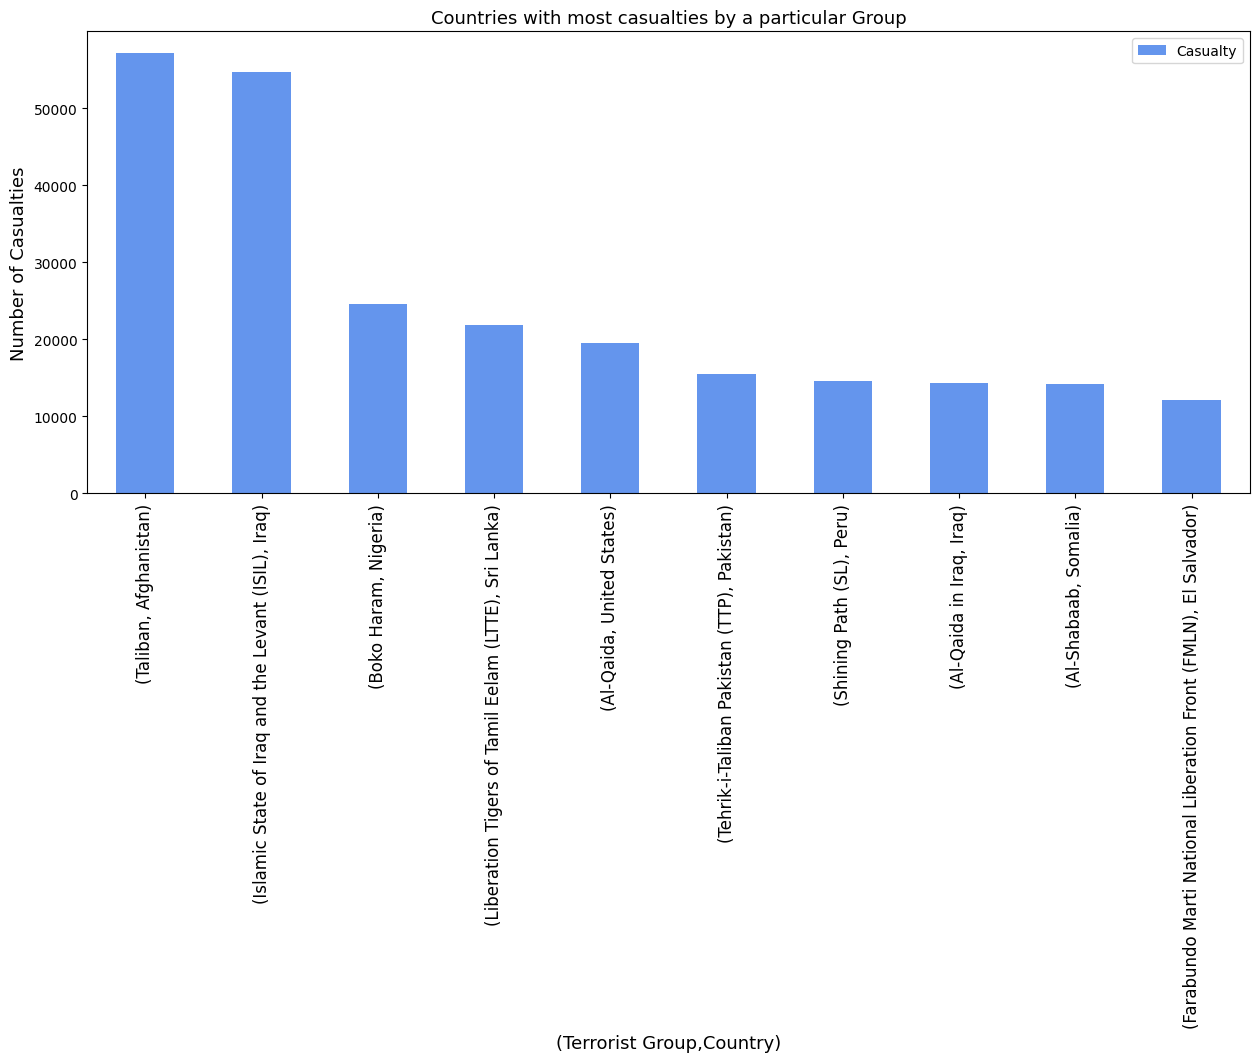

In [159]:
gcc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most casualties by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

    3. Sorting by Number of People Killed

In [160]:
gck=df[["gname","country_txt","nkill"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)
gck

C:\Users\zeelt\AppData\Local\Temp\ipykernel_4504\514881475.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gck=df[["gname","country_txt","nkill"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)


,,nkill
gname,country_txt,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


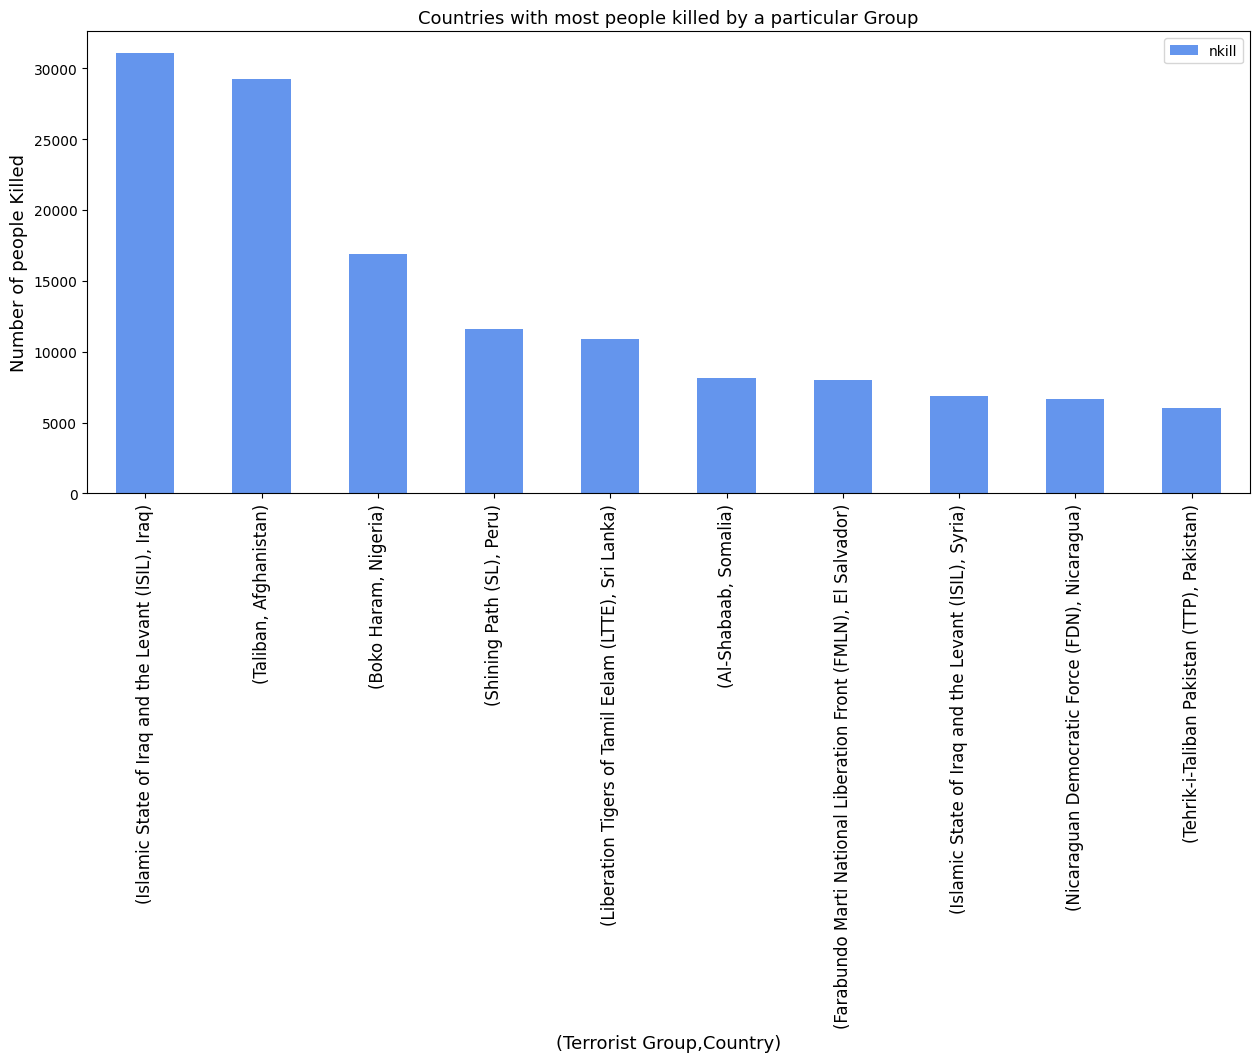

In [161]:
gck.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people killed by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

    4. Sorting by Number of People Wounded

In [162]:
gcw=df[["gname","country_txt","nwound"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)
gcw

C:\Users\zeelt\AppData\Local\Temp\ipykernel_4504\459167379.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcw=df[["gname","country_txt","nwound"]].groupby(["gname","country_txt"],axis=0).sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)


,,nwound
gname,country_txt,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


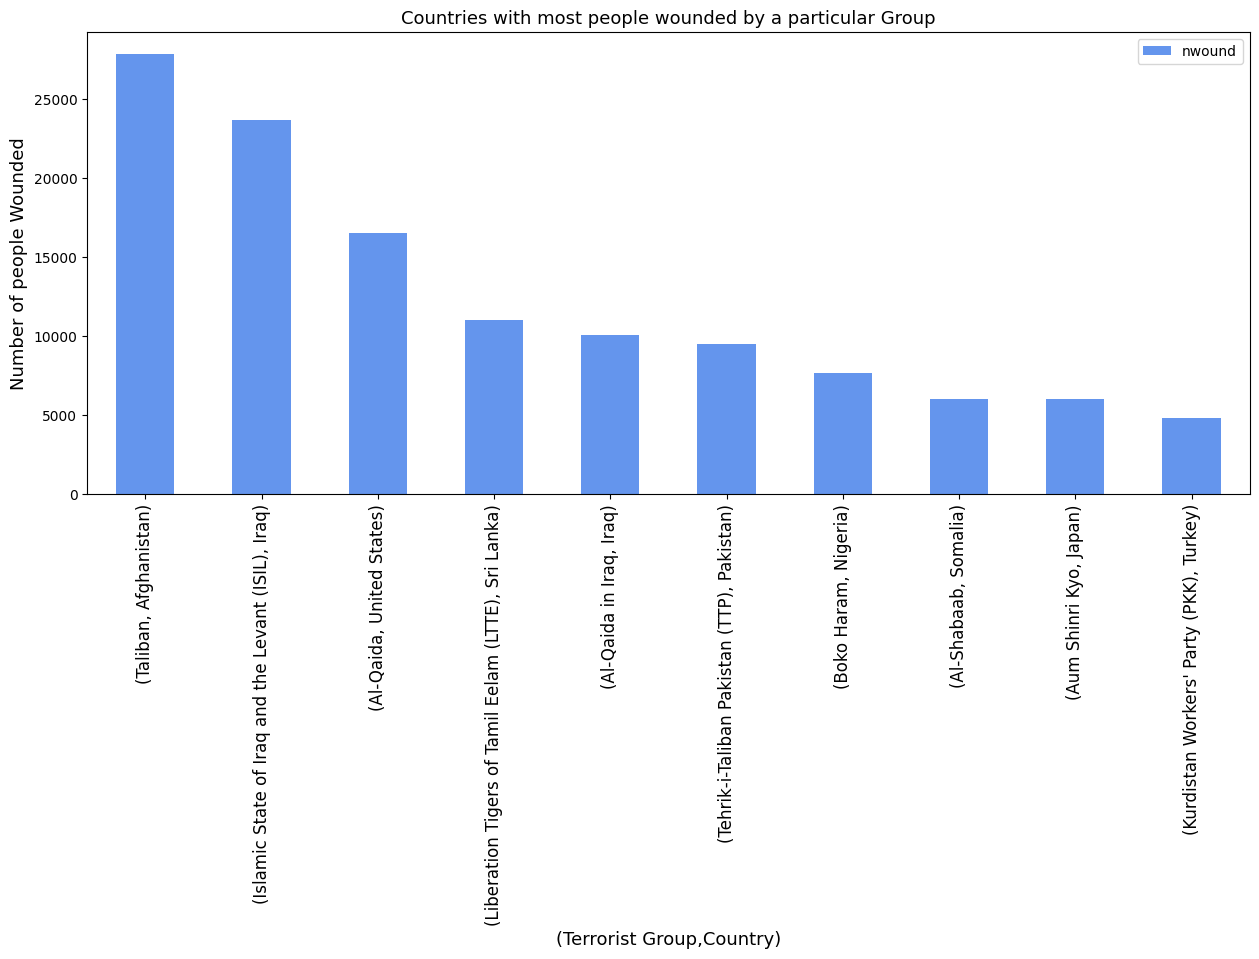

In [163]:
gcw.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Countries with most people wounded by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

### ***Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017***

    1. Total Casualties due to Terrorist Attacks: Killed + Wounded

In [164]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0


    2. Total no. of people Killed due to Terrorist Attacks

In [166]:
kill=df.loc[:,"nkill"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


    3. Total no. of people Wounded due to Terrorist Attacks

In [168]:
wound=df.loc[:,"nwound"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


## **Observations**

1. Year wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 16903 in 2014
    (b) Least number of attacks: 471 in 1971
  (ii) Casualties
    (a) Most number of casualties: 85618 in 2014
    (b) Least number of casualties: 255 in 1971
  (iii) Killed
    (a) Most number of people killed: 44490 in 2014
    (b) Least number of people killed: 173 in 1971
  (iv) Wounded
    (a) Most number of people wounded: 44043 in 2015
    (b) Least number of people wounded: 82 in 1971

2. Region wise Attacks :
  (i) Attacks
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    (b) Least number of attacks: 282 in "Australasia & Oceania"
  (ii) Casualties
    (a) Most number of casualties: 351950 in "Middle East & North Africa"
    (b) Least number of casualties: 410 in Australasia & Oceania
  (iii) Killed
    (a) Most number of people killed: 137642 in "Middle East & North Africa"
    (b) Least number of people killed: 150 in "Australasia & Oceania"
  (iv) Wounded
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    (b) Least number of people wounded: 260 in "Australasia & Oceania"


3. Country wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks: 24636 in "Iraq"
    (b) Least number of attacks: 4292 in "Turkey"
  (ii) Casualties
    (a) Most number of casualties: 213279 in "Iraq"
    (b) Least number of casualties: 22926 in "Philippines"
  (iii) Killed
    (a) Most number of people killed: 78589 in "Iraq"
    (b) Least number of people killed: 12053 in "El Salvador"
  (iv) Wounded
    (a) Most number of people wounded: 134690 in "Iraq"
    (b) Least number of people wounded: 10328 in "Colombia"

4. City wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks: 7589 in "Baghdad"
    (b) Least number of attacks: 1019 in "Athens"
  (ii) Casualties
    (a) Most number of casualties: 77876 in "Baghdad"
    (b) Least number of casualties: 5748 in "Aleppo"
  (iii) Killed
    (a) Most number of people killed: 21151 in "Baghdad"
    (b) Least number of people killed: 2125 in "Aleppo"
  (iv) Wounded
    (a) Most number of people wounded: 56725 in "Baghdad"
    (b) Least number of people wounded: 4955 in "Mogadishu"


5. Terrorist Group wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks : 7478 by "Taliban"
    (b) Least number of attacks : 2418 by "Boko Haram"
  (ii) Casualties
    (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"
  (iii) Killed
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
  (iv) Wounded
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"

6. Attack Type wise Attacks:
  (i) Attacks
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    (b) Least number of attacks : 659 by "Hijacking"
  (ii) Casualties
    (a) Most number of casualties : 530007 by "Bombing/Explosion"
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"
  (iii) Killed
    (a) Most number of people killed : 160297 by "Armed Assault"
    (b) Least number of people killed : 880 by "Unarmed Assault"
  (iv) Wounded
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"


7. Target Type wise Attacks:
  (i) Attacks
    (a) Most number of attacks : 43511 over "Private Citizens & Property"
    (b) Least number of attacks : 263 over "Abortion Related"
  (ii) Casualties
    (a) Most number of casualties : 319176 over "Private Citizens & Property"
    (b) Least number of casualties : 56 over "Abortion Related"
  (iii) Killed
    (a) Most number of people killed : 140504 over "Private Citizens & Property"
    (b) Least number of people killed : 10 over "Abortion Related"
  (iv) Wounded
    (a) Most number of people wounded : 178672 over "Private Citizens & Property"
    (b) Least number of people wounded : 46 over "Abortion Related"


8. Group and Country wise Attacks [Top 10] :
  (i) Attacks
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan"
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria"
  (ii) Casualties
    (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan"
    (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"
  (iii) Killed
    (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"
    (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"
  (iv) Wounded
    (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan"
    (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"

9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :
  (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737
  (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
  (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869